In [1]:
from sklearn.model_selection import train_test_split
import numpy
import pandas
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# read dataframe from CSV
myDataFrame = pandas.read_csv("regression_dataset.csv")
del myDataFrame["Unnamed: 0"]

display(myDataFrame)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Y
0,0.167102,0.083154,-0.096406,-0.801275,1.075555,-1.201153,1.024261,-0.156954,-0.708645,-0.196538,...,0.373473,2.707060,0.306216,1.501089,-0.493836,-0.246135,-0.636201,0.089094,-1.682549,-143.558623
1,-0.512651,1.323049,0.949039,0.576558,-0.488942,-0.251837,0.253511,0.281716,-0.870402,-0.518713,...,0.959889,-1.340798,1.227776,2.181582,1.249119,0.230329,0.599645,-2.319698,0.888376,195.906051
2,0.649028,-0.963108,-0.565901,0.413303,-0.736864,0.461006,0.368180,0.449813,1.818493,-0.876157,...,0.600717,0.851653,1.864656,-1.118712,-0.200831,1.327365,2.192438,0.343725,1.427190,-283.127373
3,0.076677,1.409741,1.442789,0.233455,0.794616,-0.880256,-0.688355,1.671363,0.601832,-1.103449,...,0.180008,0.225265,0.420292,-2.879107,-0.066227,-0.327131,1.930428,0.813451,-1.793621,65.515396
4,2.273977,2.266482,0.233081,-1.150010,0.412494,-0.380218,0.376578,0.406999,1.790466,0.617896,...,0.152225,-0.126380,-1.042323,2.001433,0.451981,-0.376933,-0.328805,-1.222329,0.502575,-350.453567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,0.612174,0.810953,-0.040851,-0.566625,0.629443,0.617884,-0.656258,2.056335,1.735905,-0.819086,...,0.403496,0.420944,-0.391437,-0.618937,0.922930,0.784517,0.751371,-1.061555,-0.651633,-83.591367
48996,1.026413,0.462496,0.906411,-0.091527,-1.439803,-0.838229,-1.749011,1.456286,0.098714,-2.212266,...,0.806000,-0.963759,-1.206119,-0.566116,-1.387706,0.129589,-0.420652,0.502607,0.157136,84.634558
48997,-0.964933,-0.218802,1.006998,-2.051831,-0.294041,-0.227723,0.635877,-0.224971,-1.254820,0.186860,...,-0.952674,2.478454,1.607402,0.393220,1.083309,-0.602386,-0.079547,-0.584053,0.518906,-30.708701
48998,1.784331,0.483905,-1.572399,0.445804,0.745019,0.449407,-2.001772,-0.437973,0.228762,-1.536932,...,-1.625841,-0.854899,-0.141347,-0.158472,2.324765,-1.767596,0.144070,0.857798,-0.773464,-329.432270


In [3]:
# seperate X and Y
Y_data = myDataFrame["Y"]
X_data = myDataFrame[list(myDataFrame.columns)[:-1]]

display(Y_data)
display(X_data)

0       -143.558623
1        195.906051
2       -283.127373
3         65.515396
4       -350.453567
            ...    
48995    -83.591367
48996     84.634558
48997    -30.708701
48998   -329.432270
48999     -3.350501
Name: Y, Length: 49000, dtype: float64

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.167102,0.083154,-0.096406,-0.801275,1.075555,-1.201153,1.024261,-0.156954,-0.708645,-0.196538,...,-0.631991,0.373473,2.707060,0.306216,1.501089,-0.493836,-0.246135,-0.636201,0.089094,-1.682549
1,-0.512651,1.323049,0.949039,0.576558,-0.488942,-0.251837,0.253511,0.281716,-0.870402,-0.518713,...,-0.221306,0.959889,-1.340798,1.227776,2.181582,1.249119,0.230329,0.599645,-2.319698,0.888376
2,0.649028,-0.963108,-0.565901,0.413303,-0.736864,0.461006,0.368180,0.449813,1.818493,-0.876157,...,-0.776247,0.600717,0.851653,1.864656,-1.118712,-0.200831,1.327365,2.192438,0.343725,1.427190
3,0.076677,1.409741,1.442789,0.233455,0.794616,-0.880256,-0.688355,1.671363,0.601832,-1.103449,...,-0.720930,0.180008,0.225265,0.420292,-2.879107,-0.066227,-0.327131,1.930428,0.813451,-1.793621
4,2.273977,2.266482,0.233081,-1.150010,0.412494,-0.380218,0.376578,0.406999,1.790466,0.617896,...,1.096006,0.152225,-0.126380,-1.042323,2.001433,0.451981,-0.376933,-0.328805,-1.222329,0.502575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,0.612174,0.810953,-0.040851,-0.566625,0.629443,0.617884,-0.656258,2.056335,1.735905,-0.819086,...,-0.174550,0.403496,0.420944,-0.391437,-0.618937,0.922930,0.784517,0.751371,-1.061555,-0.651633
48996,1.026413,0.462496,0.906411,-0.091527,-1.439803,-0.838229,-1.749011,1.456286,0.098714,-2.212266,...,1.801820,0.806000,-0.963759,-1.206119,-0.566116,-1.387706,0.129589,-0.420652,0.502607,0.157136
48997,-0.964933,-0.218802,1.006998,-2.051831,-0.294041,-0.227723,0.635877,-0.224971,-1.254820,0.186860,...,-0.691473,-0.952674,2.478454,1.607402,0.393220,1.083309,-0.602386,-0.079547,-0.584053,0.518906
48998,1.784331,0.483905,-1.572399,0.445804,0.745019,0.449407,-2.001772,-0.437973,0.228762,-1.536932,...,0.736239,-1.625841,-0.854899,-0.141347,-0.158472,2.324765,-1.767596,0.144070,0.857798,-0.773464


In [4]:
# split data into train data 80% and test data 20%
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

In [5]:
# train the model
from sklearn.linear_model import SGDRegressor

sgrObj = SGDRegressor()

sgrObj.fit(X_train.values , Y_train.values)

SGDRegressor()

In [6]:
# predict the result for the test data
Y_pred = sgrObj.predict(X_test.values)

from sklearn.metrics import r2_score

print("r2 score = " , r2_score(Y_test , Y_pred))
# means 96% of our dependent variable can be explained using our independent variables.

r2 score =  0.9999999892793954


In [7]:
# find the root mean square error
# find the percentage diffenrence in the actual and predicted values
import math
from sklearn.preprocessing import StandardScaler

# scale back the scaled Y_test and Y_predicted
scalerObjY = StandardScaler()

tempDataSet = pandas.read_csv("regression_dataset_cleaned.csv")
yForFit = numpy.array(tempDataSet["Y"])
yForFit = yForFit.reshape(-1, 1)

scalerObjY.fit(yForFit)

Y_test_scaledBack = scalerObjY.inverse_transform(numpy.array(Y_test).reshape(-1 , 1))
Y_pred_scaledBack = scalerObjY.inverse_transform(numpy.array(Y_pred).reshape(-1 , 1))

Y_test_scaledBack = Y_test_scaledBack.reshape(1 , -1)[0]
Y_pred_scaledBack = Y_pred_scaledBack.reshape(1 , -1)[0]

avgSqauredError = 0
avgPercentageChange = 0 
avgPercentageChangeArray = []
absErrorArray = []

# find root mean square error and percentage difference
for i,j in zip(Y_test_scaledBack , Y_pred_scaledBack):
    error = math.pow(i - j , 2)
    absErrorArray.append(abs(i-j))
    avgSqauredError = avgSqauredError + error

    # ( (final - initial) / initial ) * 100
    percentageChange = ( abs(j - i) / abs(i) ) * 100
    avgPercentageChangeArray.append(percentageChange)
    avgPercentageChange = avgPercentageChange + percentageChange

avgSqauredError = avgSqauredError / len(Y_test_scaledBack)
avgPercentageChange = avgPercentageChange / len(Y_test_scaledBack)
avgPercentageChangeArray = sorted(avgPercentageChangeArray)
absErrorArray = sorted(absErrorArray)

print("mean square error = {}".format(avgSqauredError))
print("root mean square error = {}".format(math.sqrt(avgSqauredError)))

# avg percentage diff can be overwhemled by some inaccurate predictions so median is preferred
print("avg percentage difference in values = {} %".format(avgPercentageChange))
print("median of percentage change = {} %".format(numpy.median(avgPercentageChangeArray)))

mean square error = 64.20866883293924
root mean square error = 8.01303118881608
avg percentage difference in values = 0.020365978314938 %
median of percentage change = 0.010353641843850098 %


<BarContainer object of 9800 artists>

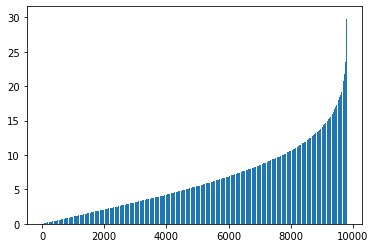

In [8]:
# errors in each Y_pred
plt.bar(range(len(absErrorArray)) , absErrorArray)

<BarContainer object of 9800 artists>

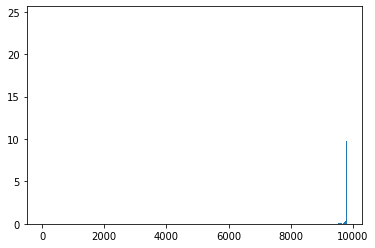

In [9]:
# percentage diff btw actaul value and predicted value

plt.bar(range(len(avgPercentageChangeArray)) , avgPercentageChangeArray)

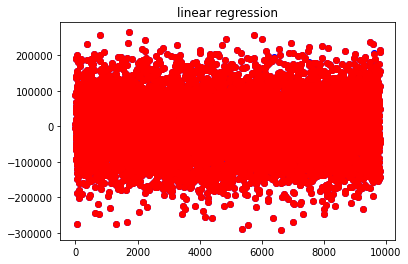

In [10]:
# scatter plot of actaul and predicted values
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()


plotGraph(Y_test_scaledBack, Y_pred_scaledBack, "linear regression")

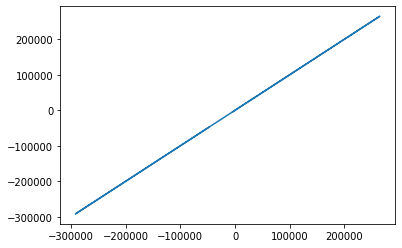

In [11]:
plt.plot(Y_test_scaledBack , Y_pred_scaledBack)

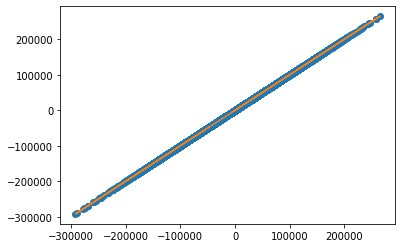

In [12]:
# plotting linear regression line
plt.plot(Y_test_scaledBack, Y_pred_scaledBack, 'o')
m, b = np.polyfit(Y_test_scaledBack, Y_pred_scaledBack, 1)

plt.plot(Y_test_scaledBack, m*Y_test_scaledBack + b)

<br>

<br>

<br>

<br>

<br>

<br>

<br>

# Implementing the model on the real world data

In [13]:
readWorldData = pandas.read_csv("regression_dataset_subSample.csv")
del readWorldData["Unnamed: 0"]

display(readWorldData)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Y
0,-1.099932,-0.642029,-0.014899,1.911673,-0.860912,-0.068959,0.007994,0.597180,0.617585,1.267755,...,-1.787917,-0.266430,-0.684969,2.170760,-1.712869,0.957569,-0.784869,-1.898660,-0.157568,252.790971
1,1.727242,0.384489,0.257787,0.918021,-0.719055,-0.213263,0.760761,-0.358022,-1.393461,0.253641,...,-1.222143,0.027658,0.616119,1.607366,0.699689,-1.368451,-0.604135,0.542882,0.408122,-244.420366
2,0.666987,0.989797,0.406240,1.850063,-0.476665,-0.724514,0.592765,-0.165862,-2.534140,1.680017,...,-2.590548,-1.260380,-1.358772,-0.537574,-1.415071,-1.856094,-0.126508,0.745857,0.686701,-4.991240
3,-0.610089,0.316023,0.218117,0.100083,0.662648,-1.144536,1.948979,-0.163250,0.576025,0.210760,...,-1.359075,1.480356,-0.946147,1.655681,-0.768043,-0.674716,-0.635919,0.465128,0.660114,173.077486
4,0.748835,0.981452,1.782589,-1.095201,0.404239,-1.425605,1.450364,0.307714,-0.102221,0.770786,...,0.025859,-1.283161,0.068179,1.169310,0.454013,-0.911447,-1.194382,0.021841,0.670957,119.787059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.102999,-1.564534,0.284822,-1.190011,-0.287116,0.801888,-0.984877,0.317284,-0.660612,0.658310,...,-1.863895,0.721664,1.158818,1.017753,1.053126,-0.196768,0.825607,0.588156,-0.535481,75.190171
996,0.693820,0.829115,1.490329,0.613474,1.223948,0.163841,-0.332082,0.769651,0.385498,-1.136340,...,0.964864,2.634095,-0.042096,-0.866832,1.193599,-0.228574,-0.571131,0.529830,0.468444,46.451709
997,-1.903026,-0.689189,-0.106614,1.428855,-1.053793,0.843896,-0.227712,0.027255,-0.853139,-0.880409,...,0.199995,-0.968003,0.598362,0.981660,0.533833,0.159868,0.291214,1.613325,0.306927,-271.643345
998,-1.497620,0.436879,-1.196456,0.086215,-0.670448,0.159330,0.592131,0.824377,0.852468,0.108499,...,-0.232001,-0.773596,-0.893817,-0.666757,-0.432252,-0.205175,-0.612312,0.373814,1.175505,-202.619791


In [14]:
rY_data = pandas.DataFrame(readWorldData["Y"] , columns=["Y"])
rX_data = readWorldData[list(readWorldData.columns)[:-1]]

display(rY_data)
display(rX_data)

,Y
0,252.790971
1,-244.420366
2,-4.991240
3,173.077486
4,119.787059
...,...
995,75.190171
996,46.451709
997,-271.643345
998,-202.619791


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-1.099932,-0.642029,-0.014899,1.911673,-0.860912,-0.068959,0.007994,0.597180,0.617585,1.267755,...,-1.487483,-1.787917,-0.266430,-0.684969,2.170760,-1.712869,0.957569,-0.784869,-1.898660,-0.157568
1,1.727242,0.384489,0.257787,0.918021,-0.719055,-0.213263,0.760761,-0.358022,-1.393461,0.253641,...,-1.230158,-1.222143,0.027658,0.616119,1.607366,0.699689,-1.368451,-0.604135,0.542882,0.408122
2,0.666987,0.989797,0.406240,1.850063,-0.476665,-0.724514,0.592765,-0.165862,-2.534140,1.680017,...,0.301832,-2.590548,-1.260380,-1.358772,-0.537574,-1.415071,-1.856094,-0.126508,0.745857,0.686701
3,-0.610089,0.316023,0.218117,0.100083,0.662648,-1.144536,1.948979,-0.163250,0.576025,0.210760,...,1.317309,-1.359075,1.480356,-0.946147,1.655681,-0.768043,-0.674716,-0.635919,0.465128,0.660114
4,0.748835,0.981452,1.782589,-1.095201,0.404239,-1.425605,1.450364,0.307714,-0.102221,0.770786,...,0.537241,0.025859,-1.283161,0.068179,1.169310,0.454013,-0.911447,-1.194382,0.021841,0.670957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.102999,-1.564534,0.284822,-1.190011,-0.287116,0.801888,-0.984877,0.317284,-0.660612,0.658310,...,-0.193415,-1.863895,0.721664,1.158818,1.017753,1.053126,-0.196768,0.825607,0.588156,-0.535481
996,0.693820,0.829115,1.490329,0.613474,1.223948,0.163841,-0.332082,0.769651,0.385498,-1.136340,...,0.255352,0.964864,2.634095,-0.042096,-0.866832,1.193599,-0.228574,-0.571131,0.529830,0.468444
997,-1.903026,-0.689189,-0.106614,1.428855,-1.053793,0.843896,-0.227712,0.027255,-0.853139,-0.880409,...,2.381977,0.199995,-0.968003,0.598362,0.981660,0.533833,0.159868,0.291214,1.613325,0.306927
998,-1.497620,0.436879,-1.196456,0.086215,-0.670448,0.159330,0.592131,0.824377,0.852468,0.108499,...,-2.667825,-0.232001,-0.773596,-0.893817,-0.666757,-0.432252,-0.205175,-0.612312,0.373814,1.175505


In [15]:
avgSqauredError = 0
avgPercentageChange = 0 
avgPercentageChangeArray = []
absErrorArray = []

YpredArray = []
YActualArray = []

for i in rX_data.index:
    currentRow = rX_data.iloc[i]
    currentRow = currentRow.to_frame().T
    
    # predict the y
    Y_predicted = sgrObj.predict(currentRow.values)[0]

    
    actual = rY_data.iloc[i]["Y"]
    predicted = Y_predicted

    YpredArray.append(predicted)
    YActualArray.append(actual)


    error = math.pow(actual - predicted , 2)
    absErrorArray.append(abs(actual-predicted))
    avgSqauredError = avgSqauredError + error

    # ( (final - initial) / initial ) * 100
    percentageChange = ( abs(predicted - actual) / abs(actual) ) * 100
    avgPercentageChangeArray.append(percentageChange)
    avgPercentageChange = avgPercentageChange + percentageChange
    

avgPercentageChangeArray = sorted(avgPercentageChangeArray)
absErrorArray = sorted(absErrorArray)

print("mean square error = {}".format(avgSqauredError))
print("root mean square error = {}".format(math.sqrt(avgSqauredError)))

# avg percentage diff can be overwhemled by some inaccurate predictions so median is preferred
print("avg percentage difference in values = {} %".format(avgPercentageChange))
print("median of percentage change = {} %".format(numpy.median(avgPercentageChangeArray)))

mean square error = 0.8748410535035971
root mean square error = 0.9353293823587481
avg percentage difference in values = 24.012062547908513 %
median of percentage change = 0.01037195996685161 %


<BarContainer object of 1000 artists>

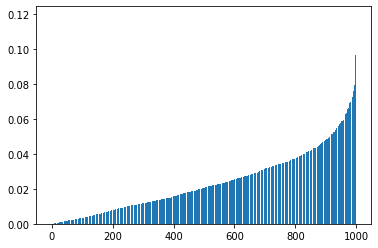

In [16]:
# errors in each Y_pred
plt.bar(range(len(absErrorArray)) , absErrorArray)

<BarContainer object of 1000 artists>

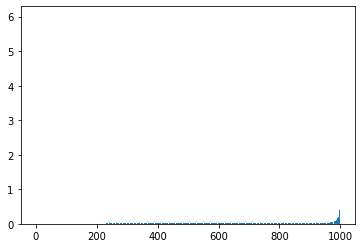

In [17]:
# percentage diff btw actaul value and predicted value

plt.bar(range(len(avgPercentageChangeArray)) , avgPercentageChangeArray)

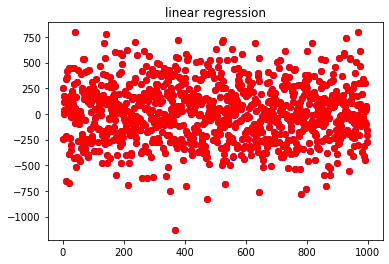

In [18]:
# scatter plot of actaul and predicted values
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()


plotGraph(YActualArray, YpredArray, "linear regression")

In [19]:
from sklearn.metrics import r2_score

print(r2_score(YActualArray , YpredArray))

0.9999999892006506


In [20]:
# as you can see applying linear regression on raw data instead of processed data lead to much better result and accuracy
# but note that , this is in this case only as that is generated by the make_regression function
# in real world it is mosty better to aplly regression on processed data only